In [17]:
import numpy as np
from itertools import accumulate
from neo.core import AnalogSignal
import quantities as pq
import matplotlib.pyplot as plt
from elephant.spike_train_generation import inhomogeneous_poisson_process
from viziphant.statistics import plot_instantaneous_rates_colormesh
from elephant import statistics, kernels

In [18]:
mean_rate = 10
min_rate = 0
max_rate = 20
speed_change = 5
time_sim = 10
sampling_var = 3
nb_neurons = 10
rate_var = lambda n,spd : ((np.random.rand(n)*2)-1)*spd
rates_gen = lambda n,mn_rate,spd,minv,maxv : np.array(list(accumulate(rate_var(n,spd),lambda i,j : min(maxv,max(minv,i+j)),initial=mn_rate)))


In [19]:
#rates(int(100*sampling_var),mean_rate,speed_change,min_rate,max_rate)

In [20]:
datas = np.empty((0,2))
datas

array([], shape=(0, 2), dtype=float64)

In [21]:
rasters = np.array([])
rasters = []
datas = np.empty((0,2))

for n in range(10):
    sign = AnalogSignal(rates_gen(int(time_sim*sampling_var),mean_rate,speed_change,min_rate,max_rate),units = 'Hz',sampling_rate = sampling_var*(pq.Hz))
    rasters.append(inhomogeneous_poisson_process(sign))
    spiketrain = inhomogeneous_poisson_process(sign,as_array=True)
    datas = np.append(datas,np.column_stack((spiketrain,np.full(len(spiketrain),n))),axis=0)

In [22]:
datas = datas[np.argsort(datas[:, 0])]

datas

array([[3.79110241e-03, 3.00000000e+00],
       [2.87159407e-02, 0.00000000e+00],
       [3.21921293e-02, 2.00000000e+00],
       ...,
       [1.03082999e+01, 7.00000000e+00],
       [1.03107429e+01, 6.00000000e+00],
       [1.03176888e+01, 8.00000000e+00]])

In [23]:
kernel = kernels.GaussianKernel(sigma=363 * pq.ms)

In [24]:
instant_rates = statistics.instantaneous_rate(rasters,
                                      sampling_period=10 * pq.ms, kernel = kernel)

<AxesSubplot:xlabel='Time (ms)', ylabel='Neuron'>

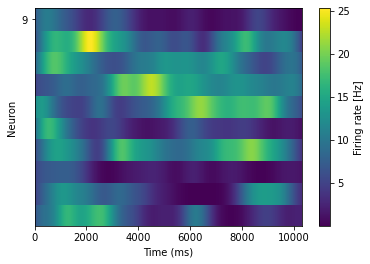

In [25]:
plot_instantaneous_rates_colormesh(instant_rates)

In [82]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import signal

In [83]:
dir_end ="/mnt/data2/paul_data/"
sim_name = "ext_e=0.4"

In [84]:
#weights= np.load(dir_end+sim_name+"-weights.npz")

In [85]:
#end_weights=weights['EE'][:,-1]

In [86]:
#plt.hist(end_weights,bins =500,log= True)
#plt.show()

In [87]:
rates=np.load(dir_end+sim_name+"-rate.npz")

In [88]:
len(rates["E"])

4500000

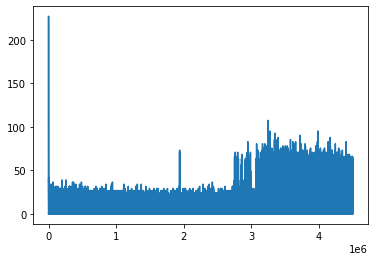

In [89]:
plt.plot(rates["E"])

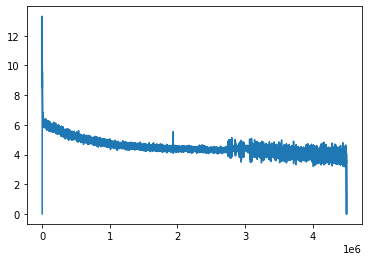

In [90]:
win = signal.windows.hann(1000)
plt.plot(np.convolve(rates["E"],win)/ sum(win))

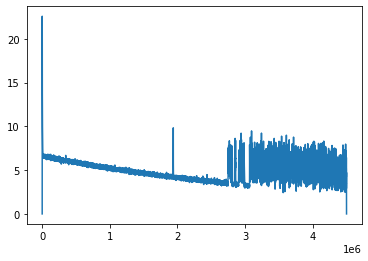

In [91]:
win = signal.windows.hann(1000)
plt.plot(np.convolve(rates["I"],win)/ sum(win))

In [92]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec
from scipy import signal

from sklearn.decomposition import NMF, PCA

from scipy.sparse import *
from scipy.io import mmread

# Import auryn tools
sys.path.append(os.path.expanduser("~/auryn/tools/python/"))
from auryntools import *
from matplotlib import animation, rc
from IPython.display import HTML

In [93]:
num_mpi_ranks = 4 # the number of sims you used in parallel
datadir = os.path.expanduser("~/data/sim_network/sim_10Hz_simple_se0.3") # Set this to your data path
prefix = "rf1"

nb_neurons = 4096
nb_stim = 4
time_range = 400
bin_size = 100e-3

In [94]:
weights = np.fromfile(dir_end+"tmp/"+sim_name+"/results/_dynamic_array_synapses_w_5206878226101100325")

In [95]:
wmatfiles  = ["%s/rf1.%i.ee.wmat"%(datadir,i) for i in range(num_mpi_ranks)]
w = np.sum( [ mmread(wf) for wf in wmatfiles ] )

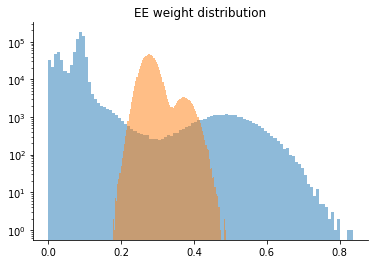

In [96]:
h1 = plt.hist(w.data, bins=100, log=True,alpha=0.5)
plt.hist(weights,bins=100,log=True,alpha=0.5);
plt.title("EE weight distribution")
sns.despine()

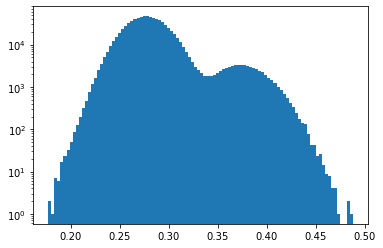

In [68]:
plt.hist(weights,bins=100,log=True);

In [ ]:
wEE=np.load(dir_end+"simple-wEE.npz")

In [ ]:
len(wEE["w"])

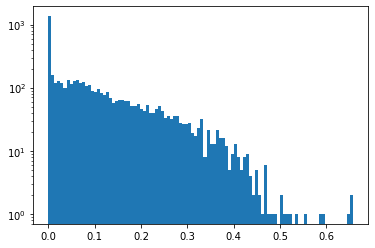

In [315]:
plt.hist(wEE["w"][:,1500],bins=100,log=True);